# Librerias de Google para excel


In [ ]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Códigos postales y máscara con datos Covid



In [ ]:
#Hoja de códigos postales seleccionados en un radio de 5km alrededor de la estación meteorológica
import pandas as pd
worksheet2 = gc.open("datos_labfis1").worksheet('CP')
rows3 = worksheet2.get_all_values()
#Se construye el dataframe para los códigos postales requeridos
CPestudio = pd.DataFrame(rows3)
CPestudio.columns = CPestudio.iloc[0]
CPestudio = CPestudio.iloc[1:]
CPestudio = pd.to_numeric(CPestudio['CP'],downcast="integer")

# Datos de Covid-19


In [ ]:
import pandas as pd
import numpy as np
#defining my worksheet
worksheet = gc.open('datos_labfis1').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(rows)

In [ ]:
#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df.shape

(11879, 125)

In [ ]:
DatosInteres=df[['FECHREG','SEXO','MPIORESI','RESDEFIN','EDAD','EVOLUCI','DIABETES','EPOC','ASMA','INMUSUPR','CP']]

In [ ]:
DatosInteres.head()

,FECHREG,SEXO,MPIORESI,RESDEFIN,EDAD,EVOLUCI,DIABETES,EPOC,ASMA,INMUSUPR,CP
1,1/6/2020,FEMENINO,ZAPOPAN,INF AH1N1 PMD,39,ALTA - MEJORIA,NO,NO,NO,NO,45200
2,1/6/2020,FEMENINO,GUADALAJARA,,37,SEGUIMIENTO TERMINADO,NO,NO,NO,NO,44340
3,1/6/2020,FEMENINO,ZAPOPAN,,26,SEGUIMIENTO TERMINADO,NO,NO,NO,NO,0
4,1/7/2020,FEMENINO,ZAPOPAN,,49,SEGUIMIENTO TERMINADO,NO,NO,NO,NO,45180
5,1/7/2020,FEMENINO,ZAPOPAN,,46,SEGUIMIENTO TERMINADO,NO,NO,NO,NO,45180


In [ ]:
Positivos=DatosInteres.loc[DatosInteres.loc[:,'RESDEFIN']=='SARS-CoV-2']
#Positivos.head(10)

# Casos positivos de Covid por código postal


In [ ]:
#Convertimos los strings de códigos postales a números
Positivos['CP']= pd.to_numeric(Positivos['CP'], errors='coerce').astype('Int64')

<ipython-input-10-af0ae28182ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Positivos['CP']= pd.to_numeric(Positivos['CP'], errors='coerce').astype('Int64')


In [ ]:
#LLenamos con ceros los espacios en donde no se tiene registro del código postal
Positivos['CP']=Positivos['CP'].fillna(0)

<ipython-input-11-787d6d7d087c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Positivos['CP']=Positivos['CP'].fillna(0)


In [ ]:
#Construimos una máscara para filtrar los códigos postales que no tendremos en cuenta
#en el análisis climático. Esta máscara es booleana
mask = Positivos['CP'].isin(CPestudio)

In [ ]:
#Creamos un nuevo dataframe enmascarando el dataframe original para obtener los datos
# de covid en un círculo de 5km de radio de la estación
PositivosCP=Positivos.loc[mask]

#PositivosCP.head()

# Fechas de casos positivos, filtrados por codigo postal

In [ ]:
PositivosCP['FECHREG']=pd.to_datetime(PositivosCP['FECHREG'])
Fechas=PositivosCP.sort_values('FECHREG')


<ipython-input-14-fc46f3349049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PositivosCP['FECHREG']=pd.to_datetime(PositivosCP['FECHREG'])


# Datos de temperatura Municipio de Guadalajara


In [ ]:
#Hoja de temperaturas Municipio de Guadalajara
import pandas as pd
#defining my worksheet
worksheet5 = gc.open("datos_labfis1").worksheet('GUAJL-Temp')
#get_all_values gives a list of rows
rows2 = worksheet5.get_all_values()
#Convert to a DataFrame
df2 = pd.DataFrame(rows2)
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:]

In [ ]:
#Se guarda en "FechasTemp" las temperaturas máximas y mínimas por cada día desde el primero de
# enero hasta diciembre del 2022
df2['FECHA']=pd.to_datetime(df2['FECHA'])
FechasTemp=df2.sort_values('FECHA')
FechasTemp['MAX']=FechasTemp['MAX'].str.replace(',','.').astype(float)
FechasTemp['MIN']=FechasTemp['MIN'].str.replace(',','.').astype(float)
#FechasTemp.head()



In [ ]:
# Se separan las fechas en tres periodos: Enero 2019 a Marzo 2020 (Prepandemia)
#                                         Abril 2020 a Abril 2021 (Primer año de pandemia)
#                                         Abril 2021 a Abril 2022 (Segundo año de pandemia)
ClimaJun19Dic19=FechasTemp[(FechasTemp['FECHA'] >= '2019-06-03')&(FechasTemp['FECHA'] <= '2019-12-29')]
ClimaEne20Mar20=FechasTemp[(FechasTemp['FECHA'] >= '2019-12-30')&(FechasTemp['FECHA'] <= '2020-03-29')]

ClimaAbr20Dic20=FechasTemp[(FechasTemp['FECHA'] >= '2020-03-30')&(FechasTemp['FECHA'] <= '2020-12-27')]
ClimaEne21Abr21=FechasTemp[(FechasTemp['FECHA'] >= '2020-12-28')&(FechasTemp['FECHA'] <= '2021-04-04')]

ClimaAbr21Dic21=FechasTemp[(FechasTemp['FECHA'] >= '2021-04-05')&(FechasTemp['FECHA'] <= '2021-12-26')]
ClimaEne22Abr22=FechasTemp[(FechasTemp['FECHA'] >= '2021-12-27')&(FechasTemp['FECHA'] <= '2022-04-03')]

#ClimaJun19Dic19.head()


In [ ]:
#Clima de toda la pandemia separado por semanas
ClimaJun19Dic19['Semana'] = ClimaJun19Dic19['FECHA'].fillna(method='ffill').dt.week
ClimaEne20Mar20['Semana'] = ClimaEne20Mar20['FECHA'].fillna(method='ffill').dt.week
ClimaAbr20Dic20['Semana'] = ClimaAbr20Dic20['FECHA'].fillna(method='ffill').dt.week
ClimaEne21Abr21['Semana'] = ClimaEne21Abr21['FECHA'].fillna(method='ffill').dt.week
ClimaAbr21Dic21['Semana'] = ClimaAbr21Dic21['FECHA'].fillna(method='ffill').dt.week
ClimaEne22Abr22['Semana'] = ClimaEne22Abr22['FECHA'].fillna(method='ffill').dt.week
#ClimaEne20Mar20.head(-1)

<ipython-input-18-9dfcd9f5abd1>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ClimaJun19Dic19['Semana'] = ClimaJun19Dic19['FECHA'].fillna(method='ffill').dt.week
<ipython-input-18-9dfcd9f5abd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClimaJun19Dic19['Semana'] = ClimaJun19Dic19['FECHA'].fillna(method='ffill').dt.week
<ipython-input-18-9dfcd9f5abd1>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ClimaEne20Mar20['Semana'] = ClimaEne20Mar20['FECHA'].fillna(method='ffill').dt.week
<ipython-input-18-9dfcd9f5abd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [ ]:
#Promedio del clima semanal durante la pandemia
MediamaxClimaJun19Dic19=ClimaJun19Dic19.groupby('Semana')['MAX'].mean()
MediaminClimaJun19Dic19=ClimaJun19Dic19.groupby('Semana')['MIN'].mean()

MediamaxClimaEne20Mar20=ClimaEne20Mar20.groupby('Semana')['MAX'].mean()
MediaminClimaEne20Mar20=ClimaEne20Mar20.groupby('Semana')['MIN'].mean()

MediamaxClimaAbr20Dic20=ClimaAbr20Dic20.groupby('Semana')['MAX'].mean()
MediaminClimaAbr20Dic20=ClimaAbr20Dic20.groupby('Semana')['MIN'].mean()

MediamaxClimaEne21Abr21=ClimaEne21Abr21.groupby('Semana')['MAX'].mean()
MediaminClimaEne21Abr21=ClimaEne21Abr21.groupby('Semana')['MIN'].mean()

MediamaxClimaAbr21Dic21=ClimaAbr21Dic21.groupby('Semana')['MAX'].mean()
MediaminClimaAbr21Dic21=ClimaAbr21Dic21.groupby('Semana')['MIN'].mean()

MediamaxClimaEne22Abr22=ClimaEne22Abr22.groupby('Semana')['MAX'].mean()
MediaminClimaEne22Abr22=ClimaEne22Abr22.groupby('Semana')['MIN'].mean()


#MediamaxClimaEne20Mar20.head()

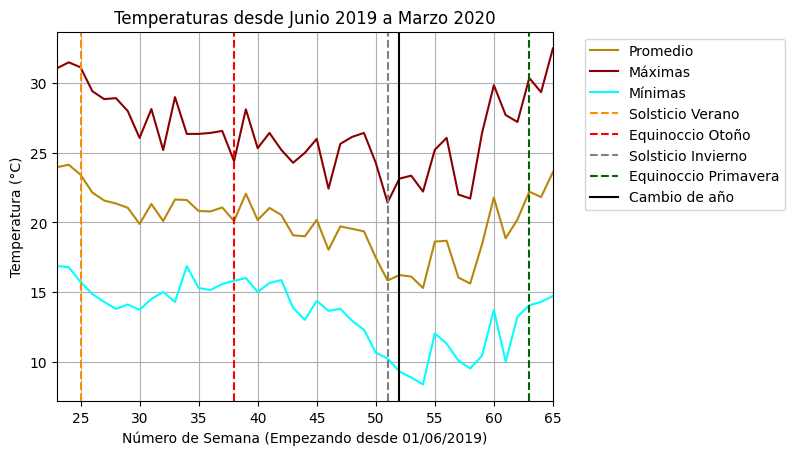

In [ ]:
import matplotlib.pyplot as plt

Temperaturaprom19_20=(np.concatenate((MediaminClimaJun19Dic19.values, MediaminClimaEne20Mar20.values))+np.concatenate((MediamaxClimaJun19Dic19.values, MediamaxClimaEne20Mar20.values)))/2
plt.plot(np.concatenate((MediamaxClimaJun19Dic19.index,(MediamaxClimaEne20Mar20.index+52))),Temperaturaprom19_20, color='darkgoldenrod',label='Promedio')


plt.plot(np.concatenate((MediamaxClimaJun19Dic19.index,(MediamaxClimaEne20Mar20.index+52))), np.concatenate((MediamaxClimaJun19Dic19.values,MediamaxClimaEne20Mar20.values)), color='darkred',label='Máximas')
plt.plot(np.concatenate((MediaminClimaJun19Dic19.index,(MediaminClimaEne20Mar20.index+52))), np.concatenate((MediaminClimaJun19Dic19.values,MediaminClimaEne20Mar20.values)), color='cyan',label='Mínimas')
plt.title('Temperaturas desde Junio 2019 a Marzo 2020')
plt.xlabel('Número de Semana (Empezando desde 01/06/2019)')
plt.ylabel('Temperatura (°C)')
plt.axvline(x=25,color='darkorange',linestyle='dashed',label='Solsticio Verano')
plt.axvline(x=38,color='red',linestyle='dashed',label='Equinoccio Otoño')
plt.axvline(x=51,color='gray',linestyle='dashed',label='Solsticio Invierno')
plt.axvline(x=63,color='darkgreen',linestyle='dashed',label='Equinoccio Primavera')
plt.axvline(x=52,color='black',linestyle='-',label='Cambio de año')
plt.xlim(23,65)
plt.grid()
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')

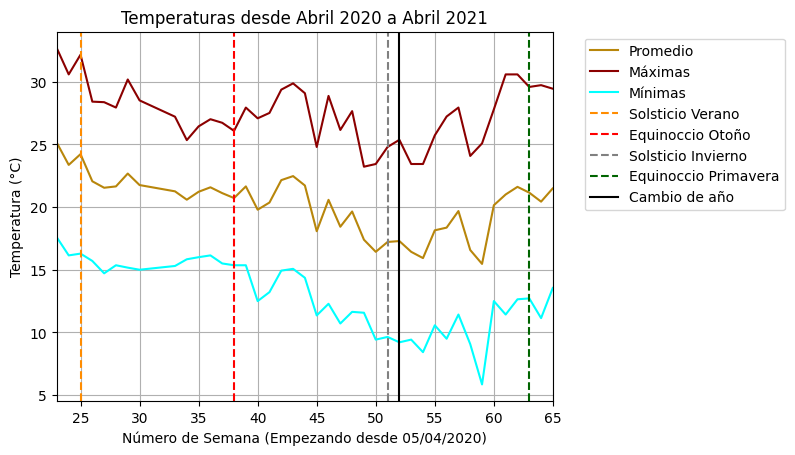

In [ ]:
import matplotlib.pyplot as plt
Temperaturaprom20_21=(np.concatenate((MediamaxClimaAbr20Dic20.values, MediamaxClimaEne21Abr21.values))+np.concatenate((MediaminClimaAbr20Dic20.values, MediaminClimaEne21Abr21.values)))/2
plt.plot(np.concatenate((MediamaxClimaAbr20Dic20.index,(MediamaxClimaEne21Abr21.index+52))),Temperaturaprom20_21, color='darkgoldenrod',label='Promedio')
plt.plot(np.concatenate((MediamaxClimaAbr20Dic20.index,(MediamaxClimaEne21Abr21.index+52))), np.concatenate((MediamaxClimaAbr20Dic20.values,MediamaxClimaEne21Abr21.values)), color='darkred',label='Máximas')
plt.plot(np.concatenate((MediaminClimaAbr20Dic20.index,(MediaminClimaEne21Abr21.index+52))), np.concatenate((MediaminClimaAbr20Dic20.values,MediaminClimaEne21Abr21.values)), color='cyan',label='Mínimas')


plt.title('Temperaturas desde Abril 2020 a Abril 2021')
plt.xlabel('Número de Semana (Empezando desde 05/04/2020)')
plt.ylabel('Temperatura (°C)')
plt.axvline(x=25,color='darkorange',linestyle='dashed',label='Solsticio Verano')
plt.axvline(x=38,color='red',linestyle='dashed',label='Equinoccio Otoño')
plt.axvline(x=51,color='gray',linestyle='dashed',label='Solsticio Invierno')
plt.axvline(x=63,color='darkgreen',linestyle='dashed',label='Equinoccio Primavera')
plt.axvline(x=52,color='black',linestyle='-',label='Cambio de año')
plt.xlim(23,65)
plt.grid()
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')

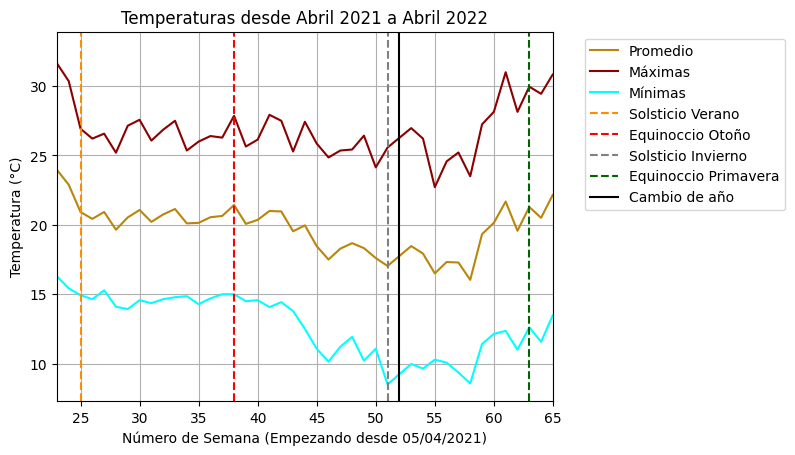

In [ ]:
import matplotlib.pyplot as plt
Temperaturaprom21_22=(np.concatenate((MediamaxClimaAbr21Dic21.values, MediamaxClimaEne22Abr22.values))+np.concatenate((MediaminClimaAbr21Dic21.values, MediaminClimaEne22Abr22.values)))/2
plt.plot(np.concatenate((MediamaxClimaAbr21Dic21.index,(MediamaxClimaEne22Abr22.index+52))),Temperaturaprom21_22, color='darkgoldenrod',label='Promedio')
plt.plot(np.concatenate((MediamaxClimaAbr21Dic21.index,(MediamaxClimaEne22Abr22.index+52))), np.concatenate((MediamaxClimaAbr21Dic21.values,MediamaxClimaEne22Abr22.values)), color='darkred',label='Máximas')
plt.plot(np.concatenate((MediaminClimaAbr21Dic21.index,(MediaminClimaEne22Abr22.index+52))), np.concatenate((MediaminClimaAbr21Dic21.values,MediaminClimaEne22Abr22.values)), color='cyan',label='Mínimas')


plt.title('Temperaturas desde Abril 2021 a Abril 2022')
plt.xlabel('Número de Semana (Empezando desde 05/04/2021)')
plt.ylabel('Temperatura (°C)')
plt.axvline(x=25,color='darkorange',linestyle='dashed',label='Solsticio Verano')
plt.axvline(x=38,color='red',linestyle='dashed',label='Equinoccio Otoño')
plt.axvline(x=51,color='gray',linestyle='dashed',label='Solsticio Invierno')
plt.axvline(x=63,color='darkgreen',linestyle='dashed',label='Equinoccio Primavera')
plt.axvline(x=52,color='black',linestyle='-',label='Cambio de año')
plt.xlim(23,65)
plt.grid()
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')

# Casos Covid por semana

Se quiere dividir los datos covid por semana para obtener un promedio de casos semanales.
En la próxima seccción se usarán las temperaturas semanales.

El año tiene 52 semanas, ya que el primer caso se registró el 5 de abril del 2020, esta será la semana 1, se tomarán las semanas iniciando en lunes y terminando el domingo, por lo que en el caso de la primer semana que será la del 30 de marzo al 5 de abril, se tendrá 1 caso, dividos en 1 día, ya que se registró el domingo. Así se analizará cada semana, dando un promedio en los días de casos registrados y no en los días de la semana, para evitar el sesgo de los días con casos nulos.

In [ ]:
Fechas20_21=Fechas[(Fechas['FECHREG']>= '2020-04-05')&(Fechas['FECHREG']<= '2021-04-04')]
Fechas21_22=Fechas[(Fechas['FECHREG']>= '2021-04-05')&(Fechas['FECHREG']<= '2022-04-04')]
Fechas21_22.head()

,FECHREG,SEXO,MPIORESI,RESDEFIN,EDAD,EVOLUCI,DIABETES,EPOC,ASMA,INMUSUPR,CP
8271,2021-04-06,FEMENINO,GUADALAJARA,SARS-CoV-2,48,SEGUIMIENTO TERMINADO,NO,NO,NO,NO,44430
8295,2021-04-08,MASCULINO,ZAPOPAN,SARS-CoV-2,54,DEFUNCION,SI,SI,NO,NO,45150
8311,2021-04-11,MASCULINO,ZAPOPAN,SARS-CoV-2,25,SEGUIMIENTO TERMINADO,NO,NO,NO,NO,45178
8313,2021-04-11,FEMENINO,GUADALAJARA,SARS-CoV-2,36,ALTA - MEJORIA,NO,NO,NO,NO,44100
8379,2021-04-19,MASCULINO,ZAPOPAN,SARS-CoV-2,44,SEGUIMIENTO TERMINADO,NO,NO,NO,NO,45180


# Graficas casos positivos durante la pandemia

<ipython-input-24-12242a89f7b1>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-24-12242a89f7b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week


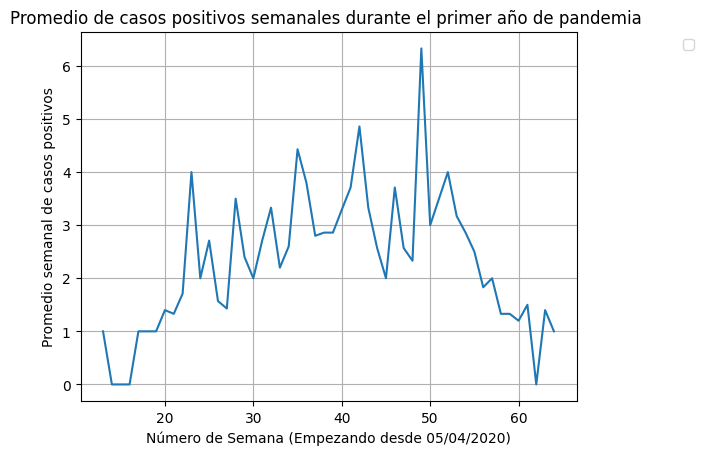

In [ ]:
#Fechas Primer Año de Pandemia
Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week
Fechas20_21.head()

df_semanal = Fechas20_21.groupby('Semana').count()
dias_con_casos = Fechas20_21.groupby('Semana').nunique()
df_semanal.head()

prom=round(df_semanal['FECHREG']/dias_con_casos['FECHREG'],2)

todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

prom = todas_semanas.merge(prom, on='Semana', how='left').fillna(0)
nuevo=prom[:13]
antes=prom[13:]
nuevo['FECHREG']
#Grafica promedio de casos por semana 1er Año
np.concatenate((antes['FECHREG'],nuevo['FECHREG']))
np.concatenate((antes.index,nuevo.index+52))
plt.plot(np.concatenate((antes.index,nuevo.index+52)),np.concatenate((antes['FECHREG'],nuevo['FECHREG'])))
plt.title('Promedio de casos positivos semanales durante el primer año de pandemia ')
plt.xlabel('Número de Semana (Empezando desde 05/04/2020)')
plt.ylabel('Promedio semanal de casos positivos')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))

<ipython-input-25-4ac16e8d418d>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechas21_22['Semana'] = Fechas21_22['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-25-4ac16e8d418d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechas21_22['Semana'] = Fechas21_22['FECHREG'].fillna(method='ffill').dt.week


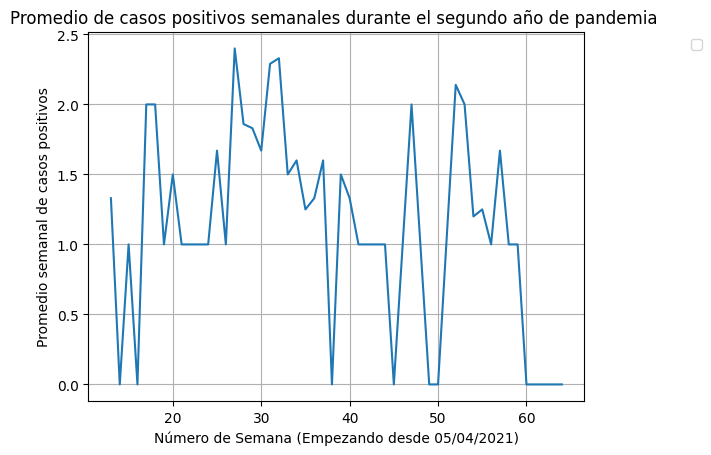

In [ ]:
#Fechas segundo Año de Pandemia
Fechas21_22['Semana'] = Fechas21_22['FECHREG'].fillna(method='ffill').dt.week
Fechas21_22.head()

df_semanal = Fechas21_22.groupby('Semana').count()
dias_con_casos = Fechas21_22.groupby('Semana').nunique()
df_semanal.head()

prom=round(df_semanal['FECHREG']/dias_con_casos['FECHREG'],2)

todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

prom = todas_semanas.merge(prom, on='Semana', how='left').fillna(0)
nuevo=prom[:13]
antes=prom[13:]
nuevo['FECHREG']
#Grafica promedio de casos por semana 1er Año
np.concatenate((antes['FECHREG'],nuevo['FECHREG']))
np.concatenate((antes.index,nuevo.index+52))
plt.plot(np.concatenate((antes.index,nuevo.index+52)),np.concatenate((antes['FECHREG'],nuevo['FECHREG'])))
plt.title('Promedio de casos positivos semanales durante el segundo año de pandemia ')
plt.xlabel('Número de Semana (Empezando desde 05/04/2021)')
plt.ylabel('Promedio semanal de casos positivos')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))

# Graficas hombres y mujeres

<ipython-input-43-9997d8679100>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Hombres['Semana']=Hombres['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-43-9997d8679100>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hombres['Semana']=Hombres['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-43-9997d8679100>:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Mujeres['Semana']=Mujeres['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-43-9997d8679100>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

0.29680858370443586
0.20794433316827166


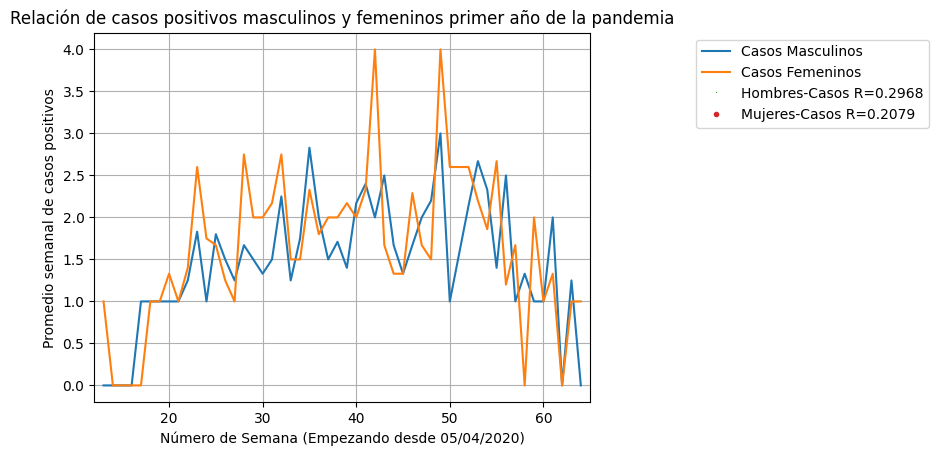

In [ ]:
import matplotlib.pyplot as plt

#GRAFICA DE CASOS POSITIVOS EN HOMBRES Y MUJERES DE ABRIL 2020 A ABRIL 2021 Y SU COEFICIENTE DE CORRELACION
Hombres=Fechas20_21.loc[Fechas20_21.loc[:,'SEXO']=='MASCULINO']
Hombres['Semana']=Hombres['FECHREG'].fillna(method='ffill').dt.week

HombresGroup = Hombres.groupby('Semana').count()
dias_con_casos_Hombres = Hombres.groupby('Semana').nunique()
HombresGroup.head()

promHombres=round(HombresGroup['FECHREG']/dias_con_casos_Hombres['FECHREG'],2)
todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

promHombres = todas_semanas.merge(promHombres, on='Semana', how='left').fillna(0)
promHombres.head(52)

nuevoH=promHombres[:13]
antesH=promHombres[13:]
#---------------------------------------------------------------------------------------
Mujeres=Fechas20_21.loc[Fechas20_21.loc[:,'SEXO']=='FEMENINO']
Mujeres['Semana']=Mujeres['FECHREG'].fillna(method='ffill').dt.week

MujeresGroup = Mujeres.groupby('Semana').count()
dias_con_casos_Mujeres = Mujeres.groupby('Semana').nunique()
MujeresGroup.head()

promMujeres=round(MujeresGroup['FECHREG']/dias_con_casos_Mujeres['FECHREG'],2)
todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

promMujeres= todas_semanas.merge(promMujeres, on='Semana', how='left').fillna(0)
promMujeres.head(52)

nuevoM=promMujeres[:13]
antesM=promMujeres[13:]

plt.plot(np.concatenate((antesH.index,nuevoH.index+52)),np.concatenate((antesH['FECHREG'],nuevoH['FECHREG'])),label='Casos Masculinos')
plt.plot(np.concatenate((antesM.index,nuevoM.index+52)),np.concatenate((antesM['FECHREG'],nuevoM['FECHREG'])),label='Casos Femeninos')
plt.plot(0,0,',',label='Hombres-Casos R=0.2968')
plt.plot(0,0,'.',label='Mujeres-Casos R=0.2079')

plt.title('Relación de casos positivos masculinos y femeninos primer año de la pandemia')
plt.xlabel('Número de Semana (Empezando desde 05/04/2020)')
plt.ylabel('Promedio semanal de casos positivos')
plt.xlim(12,65)
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))

correlacionHCasos=np.corrcoef(np.concatenate((antesH['FECHREG'],nuevoH['FECHREG'])),np.concatenate((antes.index,nuevo.index+52)))
correlacionMCasos=np.corrcoef(np.concatenate((antesM['FECHREG'],nuevoM['FECHREG'])),np.concatenate((antes.index,nuevo.index+52)))
print(correlacionHCasos[0, 1])
print(correlacionMCasos[0, 1])

<ipython-input-27-33db132051e0>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Hombres['Semana']=Hombres['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-27-33db132051e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hombres['Semana']=Hombres['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-27-33db132051e0>:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Mujeres['Semana']=Mujeres['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-27-33db132051e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

-0.27319383994256813
-0.15730072297997597


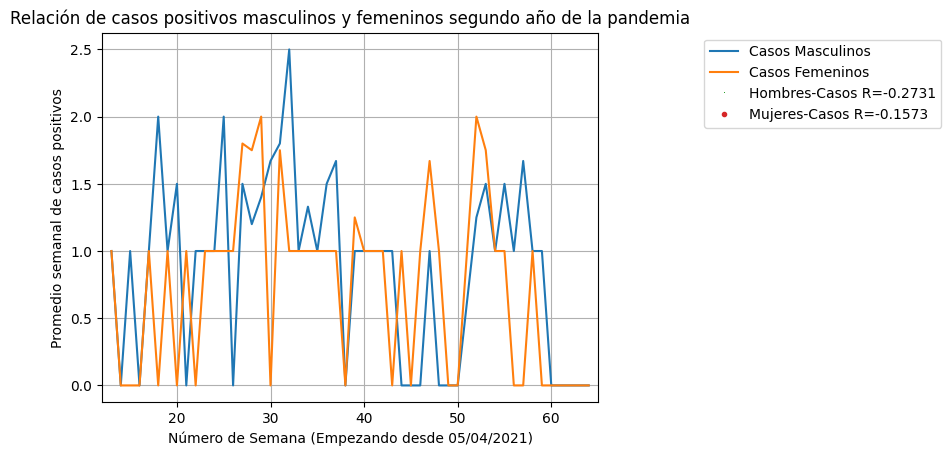

In [ ]:
#GRAFICA DE CASOS POSITIVOS EN HOMBRES Y MUJERES DE ABRIL 2021 A ABRIL 2022 Y SU COEFICIENTE DE CORRELACION
Hombres=Fechas21_22.loc[Fechas21_22.loc[:,'SEXO']=='MASCULINO']
Hombres['Semana']=Hombres['FECHREG'].fillna(method='ffill').dt.week

HombresGroup = Hombres.groupby('Semana').count()
dias_con_casos_Hombres = Hombres.groupby('Semana').nunique()
HombresGroup.head()

promHombres=round(HombresGroup['FECHREG']/dias_con_casos_Hombres['FECHREG'],2)
todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

promHombres = todas_semanas.merge(promHombres, on='Semana', how='left').fillna(0)
promHombres.head(52)

nuevoH=promHombres[:13]
antesH=promHombres[13:]
#---------------------------------------------------------------------------------------
Mujeres=Fechas21_22.loc[Fechas21_22.loc[:,'SEXO']=='FEMENINO']
Mujeres['Semana']=Mujeres['FECHREG'].fillna(method='ffill').dt.week

MujeresGroup = Mujeres.groupby('Semana').count()
dias_con_casos_Mujeres = Mujeres.groupby('Semana').nunique()
MujeresGroup.head()

promMujeres=round(MujeresGroup['FECHREG']/dias_con_casos_Mujeres['FECHREG'],2)
todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

promMujeres= todas_semanas.merge(promMujeres, on='Semana', how='left').fillna(0)
promMujeres.head(52)

nuevoM=promMujeres[:13]
antesM=promMujeres[13:]

plt.plot(np.concatenate((antesH.index,nuevoH.index+52)),np.concatenate((antesH['FECHREG'],nuevoH['FECHREG'])),label='Casos Masculinos')
plt.plot(np.concatenate((antesM.index,nuevoM.index+52)),np.concatenate((antesM['FECHREG'],nuevoM['FECHREG'])),label='Casos Femeninos')
plt.plot(0,0,',',label='Hombres-Casos R=-0.2731')
plt.plot(0,0,'.',label='Mujeres-Casos R=-0.1573')

plt.title('Relación de casos positivos masculinos y femeninos segundo año de la pandemia')
plt.xlabel('Número de Semana (Empezando desde 05/04/2021)')
plt.ylabel('Promedio semanal de casos positivos')
plt.xlim(12,65)
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
correlacionHCasos=np.corrcoef(np.concatenate((antesH['FECHREG'],nuevoH['FECHREG'])),np.concatenate((antes.index,nuevo.index+52)))
correlacionMCasos=np.corrcoef(np.concatenate((antesM['FECHREG'],nuevoM['FECHREG'])),np.concatenate((antes.index,nuevo.index+52)))
print(correlacionHCasos[0, 1])
print(correlacionMCasos[0, 1])

# Graficas de temperatura y casos

-0.35087050994868346


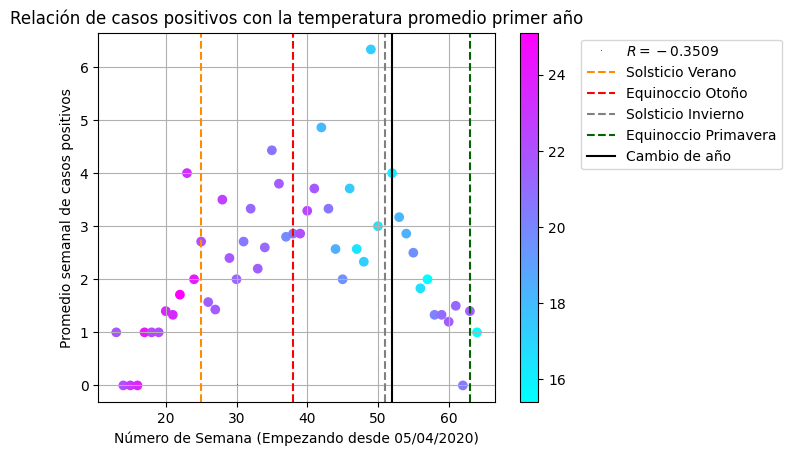

In [ ]:
import matplotlib.pyplot as plt

Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week
Fechas20_21.head()

df_semanal = Fechas20_21.groupby('Semana').count()
dias_con_casos = Fechas20_21.groupby('Semana').nunique()
df_semanal.head()

prom=round(df_semanal['FECHREG']/dias_con_casos['FECHREG'],2)

todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

prom = todas_semanas.merge(prom, on='Semana', how='left').fillna(0)
nuevo=prom[:13]
antes=prom[13:]
nuevo['FECHREG']
Temperaturaprom20_21=(np.concatenate((MediaminClimaAbr20Dic20.values, MediaminClimaEne21Abr21.values))+np.concatenate((MediamaxClimaAbr20Dic20.values, MediamaxClimaEne21Abr21.values)))/2
plt.scatter(np.concatenate((antes.index,nuevo.index+52)),np.concatenate((antes['FECHREG'],nuevo['FECHREG'])), c=Temperaturaprom20_21, cmap='cool')

plt.title('Relación de casos positivos con la temperatura promedio primer año')
plt.xlabel('Número de Semana (Empezando desde 05/04/2020)')
plt.ylabel('Promedio semanal de casos positivos')
plt.plot(30,0,',',label='$R=-0.3509$')
plt.axvline(x=25,color='darkorange',linestyle='dashed',label='Solsticio Verano')
plt.axvline(x=38,color='red',linestyle='dashed',label='Equinoccio Otoño')
plt.axvline(x=51,color='gray',linestyle='dashed',label='Solsticio Invierno')
plt.axvline(x=63,color='darkgreen',linestyle='dashed',label='Equinoccio Primavera')
plt.axvline(x=52,color='black',linestyle='-',label='Cambio de año')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.colorbar()
coef=np.corrcoef(np.concatenate((antes['FECHREG'],nuevo['FECHREG'])),Temperaturaprom20_21)
print(coef[0,1])


0.083303318055447


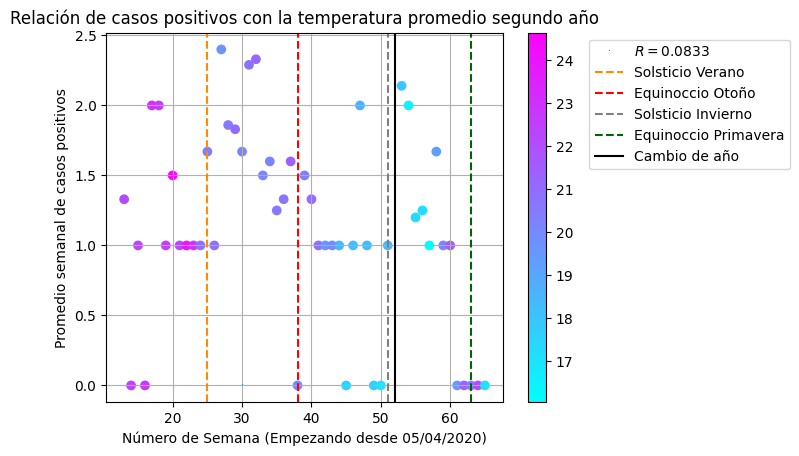

In [ ]:
Fechas21_22['Semana'] = Fechas21_22['FECHREG'].fillna(method='ffill').dt.week
Fechas21_22.head()

df_semanal = Fechas21_22.groupby('Semana').count()
dias_con_casos = Fechas21_22.groupby('Semana').nunique()
df_semanal.head()

prom=round(df_semanal['FECHREG']/dias_con_casos['FECHREG'],2)

todas_semanas = pd.DataFrame({'Semana': range(1, 53)})

prom = todas_semanas.merge(prom, on='Semana', how='left').fillna(0)
nuevo=prom[:13]
antes=prom[13:]
nuevo['FECHREG']
Temperaturaprom21_22=(np.concatenate((MediaminClimaAbr21Dic21.values, MediaminClimaEne22Abr22.values))+np.concatenate((MediamaxClimaAbr21Dic21.values, MediamaxClimaEne22Abr22.values)))/2
plt.scatter(np.concatenate((antes.index,nuevo.index+53)),np.concatenate((antes['FECHREG'],nuevo['FECHREG'])), c=Temperaturaprom21_22, cmap='cool')

plt.title('Relación de casos positivos con la temperatura promedio segundo año')
plt.xlabel('Número de Semana (Empezando desde 05/04/2020)')
plt.ylabel('Promedio semanal de casos positivos')
plt.plot(30,0,',',label='$R=0.0833$')
plt.axvline(x=25,color='darkorange',linestyle='dashed',label='Solsticio Verano')
plt.axvline(x=38,color='red',linestyle='dashed',label='Equinoccio Otoño')
plt.axvline(x=51,color='gray',linestyle='dashed',label='Solsticio Invierno')
plt.axvline(x=63,color='darkgreen',linestyle='dashed',label='Equinoccio Primavera')
plt.axvline(x=52,color='black',linestyle='-',label='Cambio de año')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.colorbar()
coef=np.corrcoef(np.concatenate((antes['FECHREG'],nuevo['FECHREG'])),Temperaturaprom21_22)
print(coef[0,1])

# Graficas casos positivos y medidas de la SEP

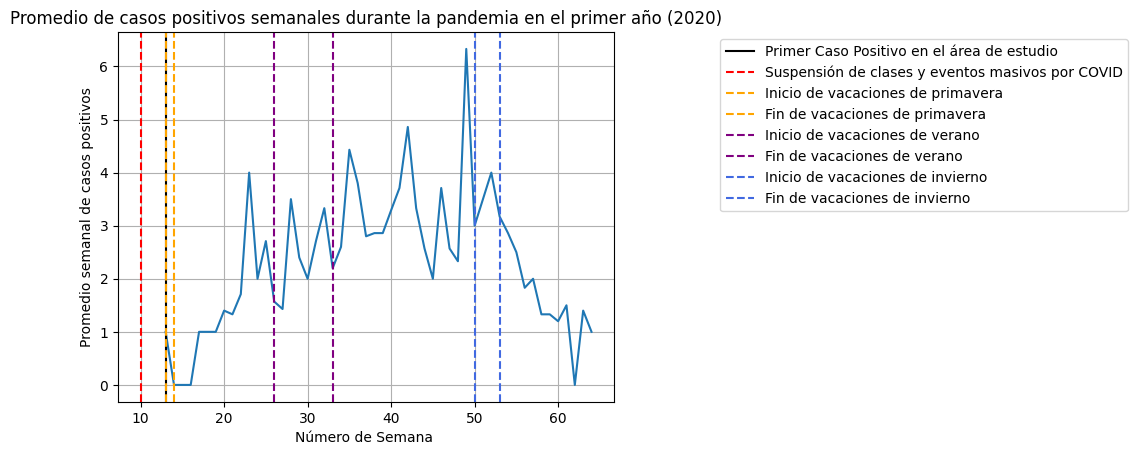

In [ ]:
#Fechas Primer Año de Pandemia
Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week
Fechas20_21.head()

df_semanal = Fechas20_21.groupby('Semana').count()
dias_con_casos = Fechas20_21.groupby('Semana').nunique()
df_semanal.head()

prom=round(df_semanal['FECHREG']/dias_con_casos['FECHREG'],2)

todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

prom = todas_semanas.merge(prom, on='Semana', how='left').fillna(0)
nuevo=prom[:13]
antes=prom[13:]
nuevo['FECHREG']
#Grafica promedio de casos por semana
np.concatenate((antes['FECHREG'],nuevo['FECHREG']))
np.concatenate((antes.index,nuevo.index+52))
plt.plot(np.concatenate((antes.index,nuevo.index+52)),np.concatenate((antes['FECHREG'],nuevo['FECHREG'])))
plt.title('Promedio de casos positivos semanales durante la pandemia en el primer año (2020)')
plt.xlabel('Número de Semana ')
plt.ylabel('Promedio semanal de casos positivos')
plt.axvline(x=13,color='black',linestyle='solid',label='Primer Caso Positivo en el área de estudio')
plt.axvline(x=10,color='red',linestyle='dashed',label='Suspensión de clases y eventos masivos por COVID')
plt.axvline(x=13,color='orange',linestyle='dashed',label='Inicio de vacaciones de primavera')
plt.axvline(x=14,color='orange',linestyle='dashed',label='Fin de vacaciones de primavera')
plt.axvline(x=26,color='purple',linestyle='dashed',label='Inicio de vacaciones de verano')
plt.axvline(x=33,color='purple',linestyle='dashed',label='Fin de vacaciones de verano')
plt.axvline(x=50,color='royalblue',linestyle='dashed',label='Inicio de vacaciones de invierno')
plt.axvline(x=53,color='royalblue',linestyle='dashed',label='Fin de vacaciones de invierno')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.grid()

<ipython-input-49-df5a979094c4>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechas21_22['Semana'] = Fechas21_22['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-49-df5a979094c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechas21_22['Semana'] = Fechas21_22['FECHREG'].fillna(method='ffill').dt.week


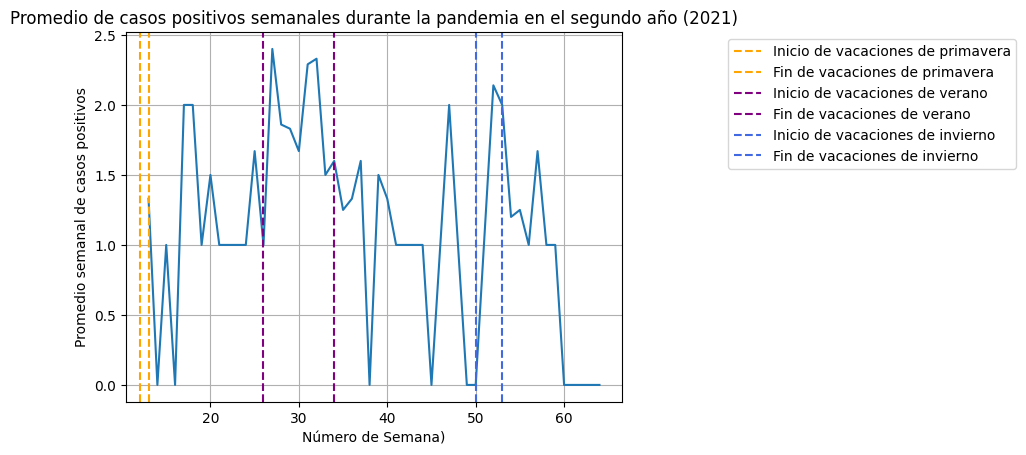

In [ ]:
#Fechas segundo Año de Pandemia

Fechas21_22['Semana'] = Fechas21_22['FECHREG'].fillna(method='ffill').dt.week
Fechas21_22.head()

df_semanal = Fechas21_22.groupby('Semana').count()
dias_con_casos = Fechas21_22.groupby('Semana').nunique()
df_semanal.head()

prom=round(df_semanal['FECHREG']/dias_con_casos['FECHREG'],2)

todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

prom = todas_semanas.merge(prom, on='Semana', how='left').fillna(0)
nuevo=prom[:13]
antes=prom[13:]
nuevo['FECHREG']
#Grafica promedio de casos por semana 1er Año
np.concatenate((antes['FECHREG'],nuevo['FECHREG']))
np.concatenate((antes.index,nuevo.index+52))
plt.plot(np.concatenate((antes.index,nuevo.index+52)),np.concatenate((antes['FECHREG'],nuevo['FECHREG'])))
plt.title('Promedio de casos positivos semanales durante la pandemia en el segundo año (2021)')
plt.xlabel('Número de Semana)')
plt.ylabel('Promedio semanal de casos positivos')
plt.axvline(x=12,color='orange',linestyle='dashed',label='Inicio de vacaciones de primavera')
plt.axvline(x=13,color='orange',linestyle='dashed',label='Fin de vacaciones de primavera')
plt.axvline(x=26,color='purple',linestyle='dashed',label='Inicio de vacaciones de verano')
plt.axvline(x=34,color='purple',linestyle='dashed',label='Fin de vacaciones de verano')
plt.axvline(x=50,color='royalblue',linestyle='dashed',label='Inicio de vacaciones de invierno')
plt.axvline(x=53,color='royalblue',linestyle='dashed',label='Fin de vacaciones de invierno')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.grid()

# Grafica casos positivos y medidas de gobierno


<ipython-input-32-365af3b5ec15>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-32-365af3b5ec15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week


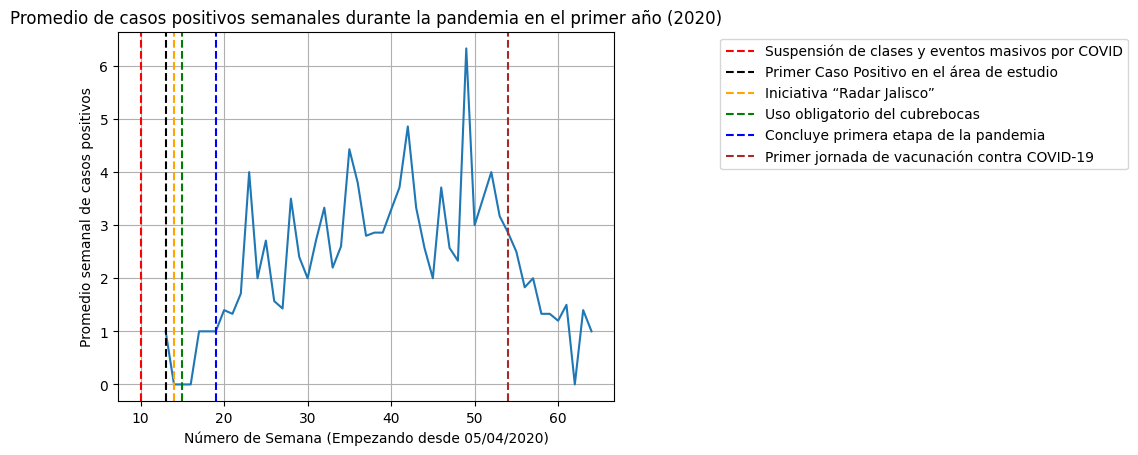

In [ ]:
#Fechas Primer Año de Pandemia
Fechas20_21['Semana'] = Fechas20_21['FECHREG'].fillna(method='ffill').dt.week
Fechas20_21.head()

df_semanal = Fechas20_21.groupby('Semana').count()
dias_con_casos = Fechas20_21.groupby('Semana').nunique()
df_semanal.head()

prom=round(df_semanal['FECHREG']/dias_con_casos['FECHREG'],2)

todas_semanas = pd.DataFrame({'Semana': range(1, 52)})

prom = todas_semanas.merge(prom, on='Semana', how='left').fillna(0)
nuevo=prom[:13]
antes=prom[13:]
nuevo['FECHREG']
#Grafica promedio de casos por semana 1er Año
np.concatenate((antes['FECHREG'],nuevo['FECHREG']))
np.concatenate((antes.index,nuevo.index+52))
plt.plot(np.concatenate((antes.index,nuevo.index+52)),np.concatenate((antes['FECHREG'],nuevo['FECHREG'])))
plt.title('Promedio de casos positivos semanales durante la pandemia en el primer año (2020)')
plt.xlabel('Número de Semana (Empezando desde 05/04/2020)')
plt.ylabel('Promedio semanal de casos positivos')
plt.axvline(x=10,color='red',linestyle='dashed',label='Suspensión de clases y eventos masivos por COVID')
plt.axvline(x=13,color='black',linestyle='dashed',label='Primer Caso Positivo en el área de estudio')
plt.axvline(x=14,color='orange',linestyle='dashed',label='Iniciativa “Radar Jalisco”')
plt.axvline(x=15,color='green',linestyle='dashed',label='Uso obligatorio del cubrebocas')
plt.axvline(x=19,color='blue',linestyle='dashed',label='Concluye primera etapa de la pandemia')
plt.axvline(x=54,color='brown',linestyle='dashed',label='Primer jornada de vacunación contra COVID-19')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.grid()

# Defunciones durante la pandemia

In [ ]:
Defunciones=PositivosCP.loc[PositivosCP.loc[:,'EVOLUCI']=='DEFUNCION']
Fechasdef20_21=Defunciones[(Defunciones['FECHREG']>= '2020-04-05')&(Defunciones['FECHREG']<= '2021-04-04')]
Fechasdef21_22=Defunciones[(Defunciones['FECHREG']>= '2021-04-05')&(Defunciones['FECHREG']<= '2022-04-04')]
#Fechasdef21_22.head(-1)


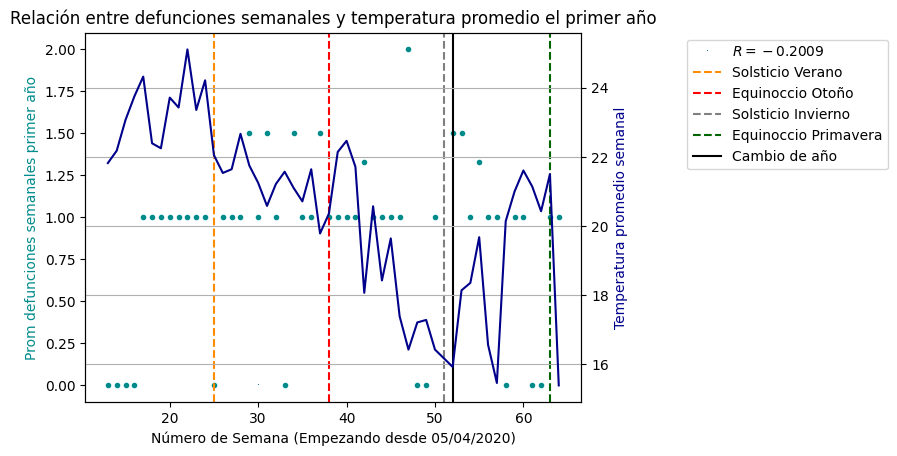

In [ ]:
#DEFUNCIONES Y TEMPERATURA PROMEDIO EN EL PRIMER AÑO

Fechasdef20_21['Semana'] = Fechasdef20_21['FECHREG'].fillna(method='ffill').dt.week
df_semanaldef = Fechasdef20_21.groupby('Semana').count()
dias_con_defunciones = Fechasdef20_21.groupby('Semana').nunique()
promdef=round(df_semanaldef['FECHREG']/dias_con_defunciones['FECHREG'],2)
todas_semanasdef = pd.DataFrame({'Semana': range(1, 52)})
promdef = todas_semanasdef.merge(promdef, on='Semana', how='left').fillna(0)
promdef.head(52)
nuevodef=promdef[:13]
antesdef=promdef[13:]
nuevodef['FECHREG']
np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG']))
np.concatenate((antesdef.index,nuevodef.index+52))

#Grafica
fig, axes = plt.subplots()
axes.plot(np.concatenate((antesdef.index,nuevodef.index+52)), np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG'])),'.', color='darkcyan')
axes.plot(30,0,',',label='$R=-0.2009$')

axes.set_xlabel('Número de Semana (Empezando desde 05/04/2020)')
axes.set_ylabel('Prom defunciones semanales primer año', color='darkcyan')
axes.axvline(x=25,color='darkorange',linestyle='dashed',label='Solsticio Verano')
axes.axvline(x=38,color='red',linestyle='dashed',label='Equinoccio Otoño')
axes.axvline(x=51,color='gray',linestyle='dashed',label='Solsticio Invierno')
axes.axvline(x=63,color='darkgreen',linestyle='dashed',label='Equinoccio Primavera')
axes.axvline(x=52,color='black',linestyle='-',label='Cambio de año')
twin_axes = axes.twinx()
axes.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
Temperaturaprom20_21=(np.concatenate((MediaminClimaAbr20Dic20.values, MediaminClimaEne21Abr21.values))+np.concatenate((MediamaxClimaAbr20Dic20.values, MediamaxClimaEne21Abr21.values)))/2
twin_axes.plot(np.concatenate((antesdef.index,nuevodef.index+52)),Temperaturaprom20_21, color='darkblue')
twin_axes.set_ylabel('Temperatura promedio semanal', color='darkblue')
plt.title('Relación entre defunciones semanales y temperatura promedio el primer año')
plt.grid()
plt.show()




<ipython-input-35-d34cefb42200>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechasdef21_22['Semana'] = Fechasdef21_22['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-35-d34cefb42200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechasdef21_22['Semana'] = Fechasdef21_22['FECHREG'].fillna(method='ffill').dt.week


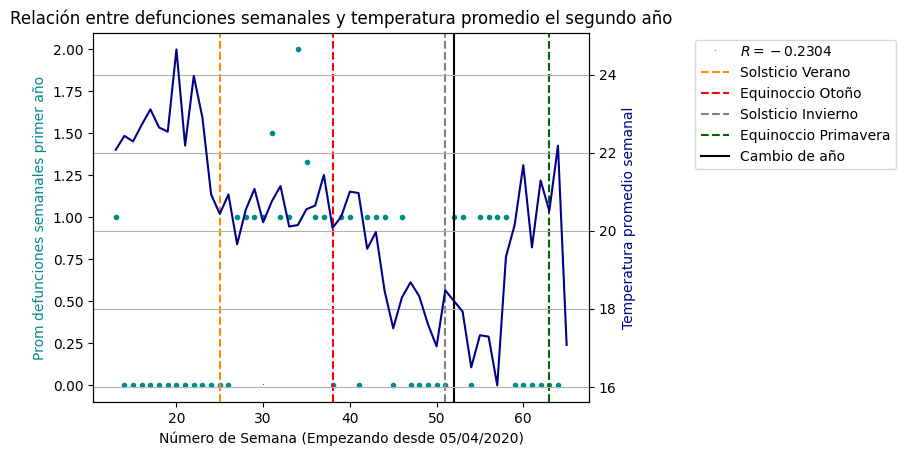

-0.22149235408411755


In [ ]:
#DEFUNCIONES Y TEMPERATURA PROMEDIO EN EL SEGUNDO AÑO

Fechasdef21_22['Semana'] = Fechasdef21_22['FECHREG'].fillna(method='ffill').dt.week
df_semanaldef = Fechasdef21_22.groupby('Semana').count()
dias_con_defunciones = Fechasdef21_22.groupby('Semana').nunique()
promdef=round(df_semanaldef['FECHREG']/dias_con_defunciones['FECHREG'],2)
todas_semanasdef = pd.DataFrame({'Semana': range(1, 53)})
promdef = todas_semanasdef.merge(promdef, on='Semana', how='left').fillna(0)
promdef.head(52)
nuevodef=promdef[:13]
antesdef=promdef[13:]
nuevodef['FECHREG']
np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG']))
np.concatenate((antesdef.index,nuevodef.index+53))

#Grafica
fig, axes = plt.subplots()
axes.plot(np.concatenate((antesdef.index,nuevodef.index+52)), np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG'])),'.', color='darkcyan')
axes.plot(30,0,',',label='$R=-0.2304$')
axes.axvline(x=25,color='darkorange',linestyle='dashed',label='Solsticio Verano')
axes.axvline(x=38,color='red',linestyle='dashed',label='Equinoccio Otoño')
axes.axvline(x=51,color='gray',linestyle='dashed',label='Solsticio Invierno')
axes.axvline(x=63,color='darkgreen',linestyle='dashed',label='Equinoccio Primavera')
axes.axvline(x=52,color='black',linestyle='-',label='Cambio de año')
axes.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
axes.set_xlabel('Número de Semana (Empezando desde 05/04/2020)')
axes.set_ylabel('Prom defunciones semanales primer año', color='darkcyan')
twin_axes = axes.twinx()
Temperaturaprom21_22=(np.concatenate((MediaminClimaAbr21Dic21.values, MediaminClimaEne22Abr22.values))+np.concatenate((MediamaxClimaAbr21Dic21.values, MediamaxClimaEne22Abr22.values)))/2
twin_axes.plot(np.concatenate((antesdef.index,nuevodef.index+53)),Temperaturaprom21_22, color='darkblue')
twin_axes.set_ylabel('Temperatura promedio semanal', color='darkblue')
plt.title('Relación entre defunciones semanales y temperatura promedio el segundo año')
plt.grid()
plt.show()

correlacionHM=np.corrcoef(Temperaturaprom21_22,np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG'])))
print(correlacionHM[0, 1])

<ipython-input-46-eebff8cf2a20>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechasdef20_21['Semana'] = Fechasdef20_21['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-46-eebff8cf2a20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechasdef20_21['Semana'] = Fechasdef20_21['FECHREG'].fillna(method='ffill').dt.week


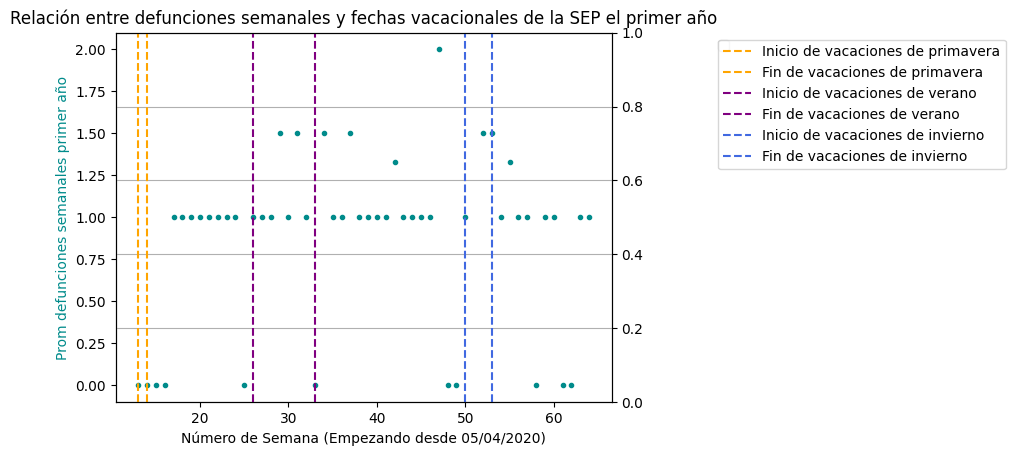

In [ ]:
#DEFUNCIONES y VACACIONES EN EL PRIMER AÑO

Fechasdef20_21['Semana'] = Fechasdef20_21['FECHREG'].fillna(method='ffill').dt.week
df_semanaldef = Fechasdef20_21.groupby('Semana').count()
dias_con_defunciones = Fechasdef20_21.groupby('Semana').nunique()
promdef=round(df_semanaldef['FECHREG']/dias_con_defunciones['FECHREG'],2)
todas_semanasdef = pd.DataFrame({'Semana': range(1, 52)})
promdef = todas_semanasdef.merge(promdef, on='Semana', how='left').fillna(0)
promdef.head(52)
nuevodef=promdef[:13]
antesdef=promdef[13:]
nuevodef['FECHREG']
np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG']))
np.concatenate((antesdef.index,nuevodef.index+52))

#Grafica
fig, axes = plt.subplots()
axes.plot(np.concatenate((antesdef.index,nuevodef.index+52)), np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG'])),'.', color='darkcyan')

axes.set_xlabel('Número de Semana (Empezando desde 05/04/2020)')
axes.set_ylabel('Prom defunciones semanales primer año', color='darkcyan')
twin_axes = axes.twinx()
axes.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.title('Relación entre defunciones semanales y fechas vacacionales de la SEP el primer año')
plt.axvline(x=13,color='orange',linestyle='dashed',label='Inicio de vacaciones de primavera')
plt.axvline(x=14,color='orange',linestyle='dashed',label='Fin de vacaciones de primavera')
plt.axvline(x=26,color='purple',linestyle='dashed',label='Inicio de vacaciones de verano')
plt.axvline(x=33,color='purple',linestyle='dashed',label='Fin de vacaciones de verano')
plt.axvline(x=50,color='royalblue',linestyle='dashed',label='Inicio de vacaciones de invierno')
plt.axvline(x=53,color='royalblue',linestyle='dashed',label='Fin de vacaciones de invierno')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.grid()
plt.show()

<ipython-input-47-7e8a3f54182f>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechasdef21_22['Semana'] = Fechasdef21_22['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-47-7e8a3f54182f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechasdef21_22['Semana'] = Fechasdef21_22['FECHREG'].fillna(method='ffill').dt.week


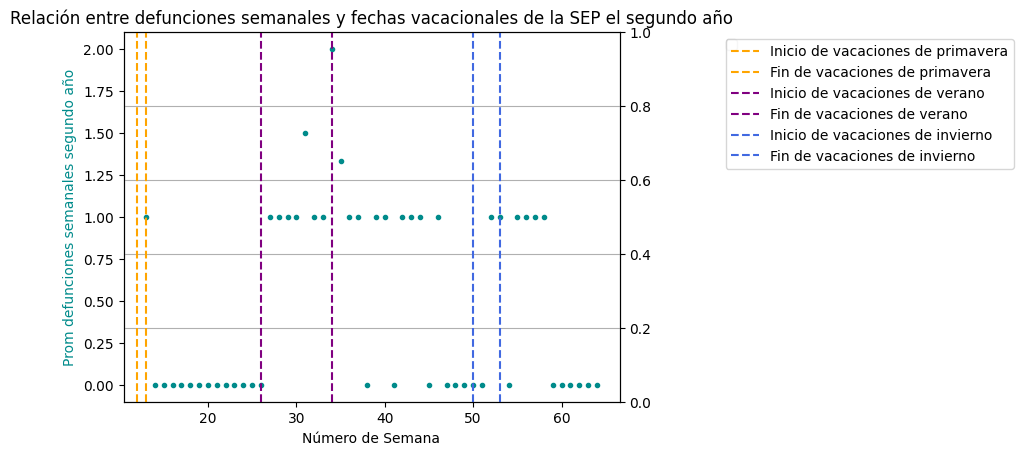

In [ ]:
#DEFUNCIONES Y VACACIONES EN EL SEGUNDO AÑO

Fechasdef21_22['Semana'] = Fechasdef21_22['FECHREG'].fillna(method='ffill').dt.week
df_semanaldef = Fechasdef21_22.groupby('Semana').count()
dias_con_defunciones = Fechasdef21_22.groupby('Semana').nunique()
promdef=round(df_semanaldef['FECHREG']/dias_con_defunciones['FECHREG'],2)
todas_semanasdef = pd.DataFrame({'Semana': range(1, 53)})
promdef = todas_semanasdef.merge(promdef, on='Semana', how='left').fillna(0)
promdef.head(52)
nuevodef=promdef[:13]
antesdef=promdef[13:]
nuevodef['FECHREG']
np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG']))
np.concatenate((antesdef.index,nuevodef.index+53))

#Grafica
fig, axes = plt.subplots()
axes.plot(np.concatenate((antesdef.index,nuevodef.index+52)), np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG'])),'.', color='darkcyan')

axes.set_xlabel('Número de Semana')
axes.set_ylabel('Prom defunciones semanales segundo año', color='darkcyan')
twin_axes = axes.twinx()
axes.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.title('Relación entre defunciones semanales y fechas vacacionales de la SEP el segundo año')
plt.axvline(x=12,color='orange',linestyle='dashed',label='Inicio de vacaciones de primavera')
plt.axvline(x=13,color='orange',linestyle='dashed',label='Fin de vacaciones de primavera')
plt.axvline(x=26,color='purple',linestyle='dashed',label='Inicio de vacaciones de verano')
plt.axvline(x=34,color='purple',linestyle='dashed',label='Fin de vacaciones de verano')
plt.axvline(x=50,color='royalblue',linestyle='dashed',label='Inicio de vacaciones de invierno')
plt.axvline(x=53,color='royalblue',linestyle='dashed',label='Fin de vacaciones de invierno')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.grid()
plt.show()

<ipython-input-38-2e78813a84fc>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Fechasdef20_21['Semana'] = Fechasdef20_21['FECHREG'].fillna(method='ffill').dt.week
<ipython-input-38-2e78813a84fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fechasdef20_21['Semana'] = Fechasdef20_21['FECHREG'].fillna(method='ffill').dt.week


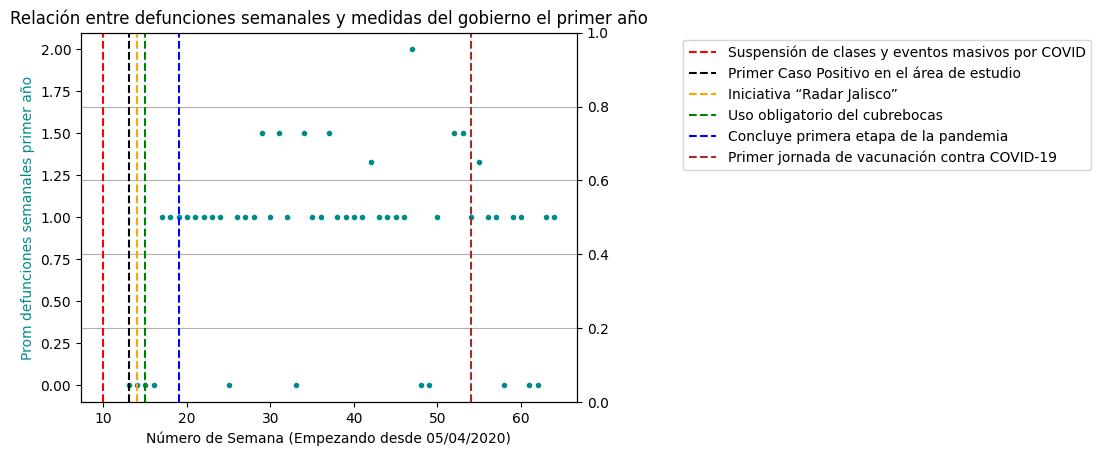

In [ ]:
#DEFUNCIONES y MEDIDAS DEL GOBIERNO EN EL PRIMER AÑO

Fechasdef20_21['Semana'] = Fechasdef20_21['FECHREG'].fillna(method='ffill').dt.week
df_semanaldef = Fechasdef20_21.groupby('Semana').count()
dias_con_defunciones = Fechasdef20_21.groupby('Semana').nunique()
promdef=round(df_semanaldef['FECHREG']/dias_con_defunciones['FECHREG'],2)
todas_semanasdef = pd.DataFrame({'Semana': range(1, 52)})
promdef = todas_semanasdef.merge(promdef, on='Semana', how='left').fillna(0)
promdef.head(52)
nuevodef=promdef[:13]
antesdef=promdef[13:]
nuevodef['FECHREG']
np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG']))
np.concatenate((antesdef.index,nuevodef.index+52))

#Grafica
fig, axes = plt.subplots()
axes.plot(np.concatenate((antesdef.index,nuevodef.index+52)), np.concatenate((antesdef['FECHREG'],nuevodef['FECHREG'])),'.', color='darkcyan')

axes.set_xlabel('Número de Semana (Empezando desde 05/04/2020)')
axes.set_ylabel('Prom defunciones semanales primer año', color='darkcyan')
twin_axes = axes.twinx()
axes.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.title('Relación entre defunciones semanales y medidas del gobierno el primer año')
plt.axvline(x=10,color='red',linestyle='dashed',label='Suspensión de clases y eventos masivos por COVID')
plt.axvline(x=13,color='black',linestyle='dashed',label='Primer Caso Positivo en el área de estudio')
plt.axvline(x=14,color='orange',linestyle='dashed',label='Iniciativa “Radar Jalisco”')
plt.axvline(x=15,color='green',linestyle='dashed',label='Uso obligatorio del cubrebocas')
plt.axvline(x=19,color='blue',linestyle='dashed',label='Concluye primera etapa de la pandemia')
plt.axvline(x=54,color='brown',linestyle='dashed',label='Primer jornada de vacunación contra COVID-19')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, .5, 0.5, 0.5))
plt.grid()
plt.show()